In [1]:
import pandas as pd
import numpy as np
from utils import storage, plot, helpers, dates

from IPython.display import display, Markdown
from matplotlib import pyplot



In [19]:
today = dates.last_day
one_day = dates.one_day
yesterday = today - one_day

display(Markdown('# Песочница по статистике по коронавирусу COVID-19'))
display(Markdown('---'))
with helpers.setlocale_ctx('ru_RU'):
    display(Markdown(f"Данные в отчетах охватывают период \
         с '_{dates.first_day.date().strftime('%d %B, %Y')}_' \
         по '_{dates.last_day.date().strftime('%d %B, %Y')}_'. \
        За \"Сегодня\" принят последний доступный день в отчетах"))

# Песочница по статистике по коронавирусу COVID-19

---

Данные в отчетах охватывают период          с '_22 января, 2020_'          по '_15 октября, 2020_'.         За "Сегодня" принят последний доступный день в отчетах

In [3]:
display(Markdown("## Топ десять стран по количеству заболевших на \"Сегодня\""))
display(Markdown("В таблице представлены ТОП-10 стран отсортированны по количеству заболевших на \"Сегодня\", а также с данными по количеству заболевших за последние 7 дней"))

storage.get_countries_report_by_column("Confirmed_Change", start_date=today - one_day * 6).fillna(0).sort_values(by=today, axis = 1).iloc[:,-10:]

## Топ десять стран по количеству заболевших на "Сегодня"

В таблице представлены ТОП-10 стран отсортированны по количеству заболевших на "Сегодня", а также с данными по количеству заболевших за последние 7 дней

,Czechia,Belgium,Spain,Russia,Argentina,UK,Brazil,France,India,US
Date,,,,,,,,,,
2020-10-09,8617,5385,12788,11969,15099,13888,27444,20730,73272,57420
2020-10-10,4631,7950,0,12673,12414,15175,26749,0,74383,54639
2020-10-11,3105,5327,0,13442,10324,12882,12342,0,66732,44614
2020-10-12,4311,3622,27856,13406,9524,14011,8429,43663,55342,41653
2020-10-13,8326,7360,7118,13690,13305,17250,10220,22160,63509,52406
2020-10-14,9543,8271,11970,14041,14932,19751,27235,22119,67708,59494
2020-10-15,9720,10448,13318,13556,17096,18996,28523,30621,63371,63610


## Динамика ТОП-5 стран по количеству заболевших на "Сегодня"

Здесь и ниже суффикс SMA означает среднее количество за N дней.

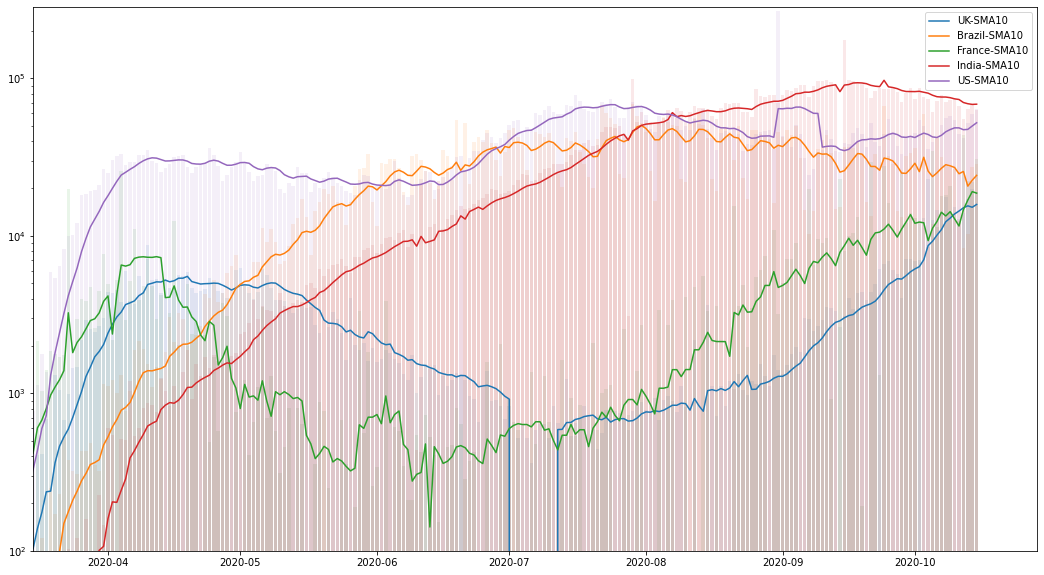

In [4]:
display(Markdown("## Динамика ТОП-5 стран по количеству заболевших на \"Сегодня\""))
display(Markdown("Здесь и ниже суффикс SMA означает среднее количество за N дней."))

countries_list = list(storage.get_countries_report_by_column("Confirmed_Change", start_date=today).fillna(0).sort_values(by=today, axis = 1).iloc[:,-5:].columns)

pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

column_name = 'Confirmed_Change'

for country in countries_list:
    country_df = storage.get_country_report(country)
    plot.bar_with_sma_line(ax, country_df[column_name], 10, country, 0.1)
ax.legend()
ax.set_xlim(pd.to_datetime('15-03-2020', dayfirst=True))
ax.set_ylim(bottom=100)
pyplot.yscale("log")
pyplot.show()

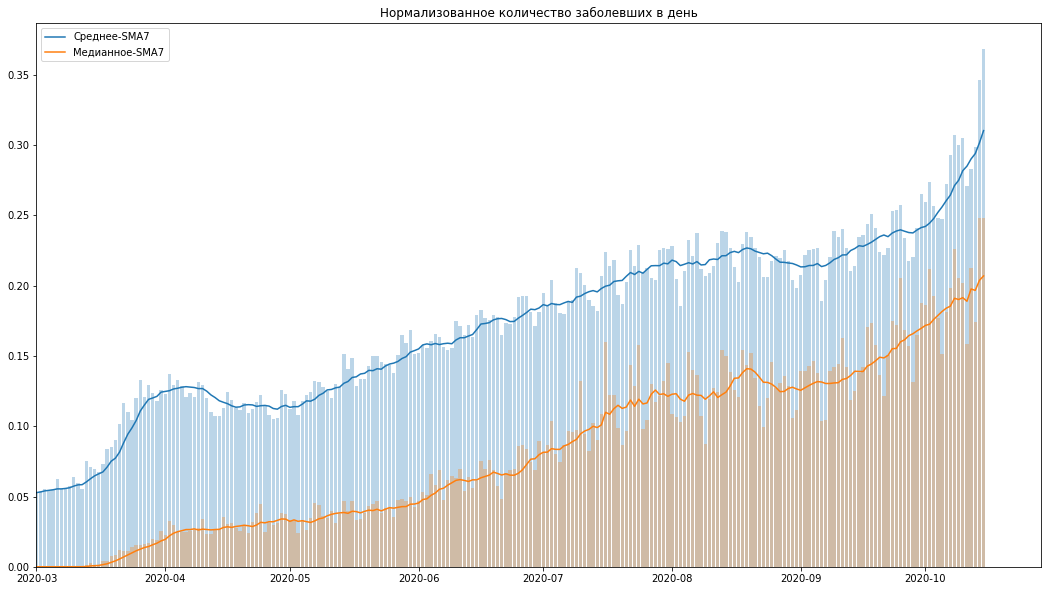

In [5]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

all_countries = storage.get_countries_report_by_column(column_name).fillna(0).apply(helpers.normalize)
mean = all_countries.mean(axis=1)
median = all_countries.quantile(.5, axis=1)

plot.bar_with_sma_line(ax, mean, label="Среднее")
plot.bar_with_sma_line(ax, median, label="Медианное")
ax.legend()

ax.set_xlim(pd.to_datetime('01-03-2020', dayfirst=True))
pyplot.title("Нормализованное количество заболевших в день")
pyplot.show()


In [6]:
column_name = "Confirmed_Change"
start_date = pd.to_datetime('01-04-2020', dayfirst=True)

moscow_df = storage.get_region_report("Russia", "Москва")[start_date:]
regions_df = storage.get_regions_report_by_column("Russia", column_name, exclude=["Москва"], start_date=start_date)


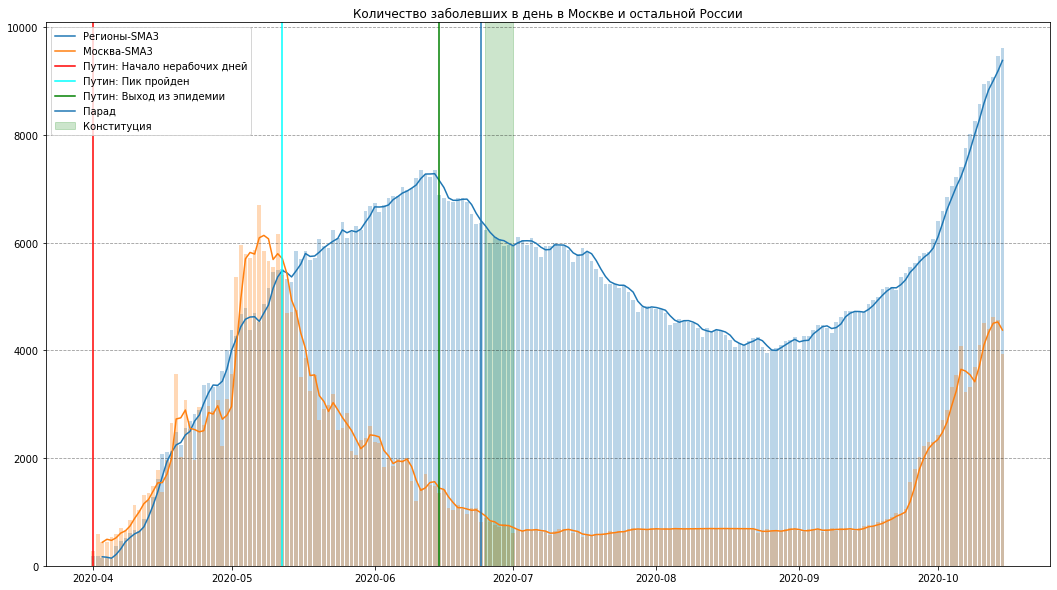

In [7]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

regions_df['Total'] = 0
regions_df['Total'] = regions_df.sum(axis = 1)

plot.bar_with_sma_line(ax, regions_df.Total, 3, 'Регионы')
plot.bar_with_sma_line(ax, moscow_df[column_name], 3, 'Москва')
plot.key_russian_dates(ax)

#ax.set_ylim(bottom=5000, top = 6500)
ax.legend(loc='upper left')
ax.set_title('Количество заболевших в день в Москве и остальной России')
ax.grid(axis='y', color='black', linestyle='dashed', alpha=0.4)
pyplot.show()

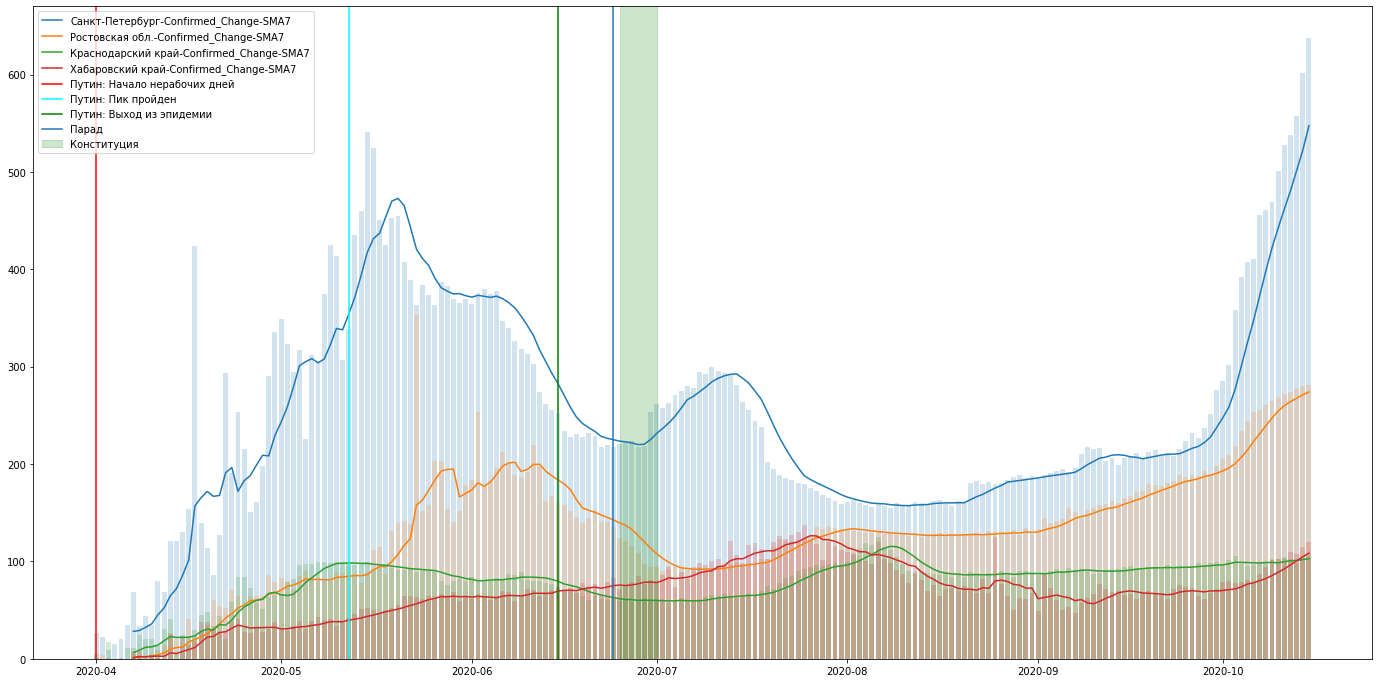

In [8]:
pyplot.figure(figsize=(24,12))

ax = pyplot.subplot(111)
ax.xaxis_date()

column_name = 'Confirmed_Change'

for region_name in ["Санкт-Петербург", "Ростовская обл.", "Краснодарский край", "Хабаровский край"]:
    region_df = storage.get_region_report("Russia", region_name)[start_date:]

    plot.bar_with_sma_line(ax, region_df[column_name], 7, region_name+'-'+column_name, 0.2)
plot.key_russian_dates(ax)

#ax.set_ylim(bottom=5000, top = 6500)
ax.legend(loc='upper left')
pyplot.show()

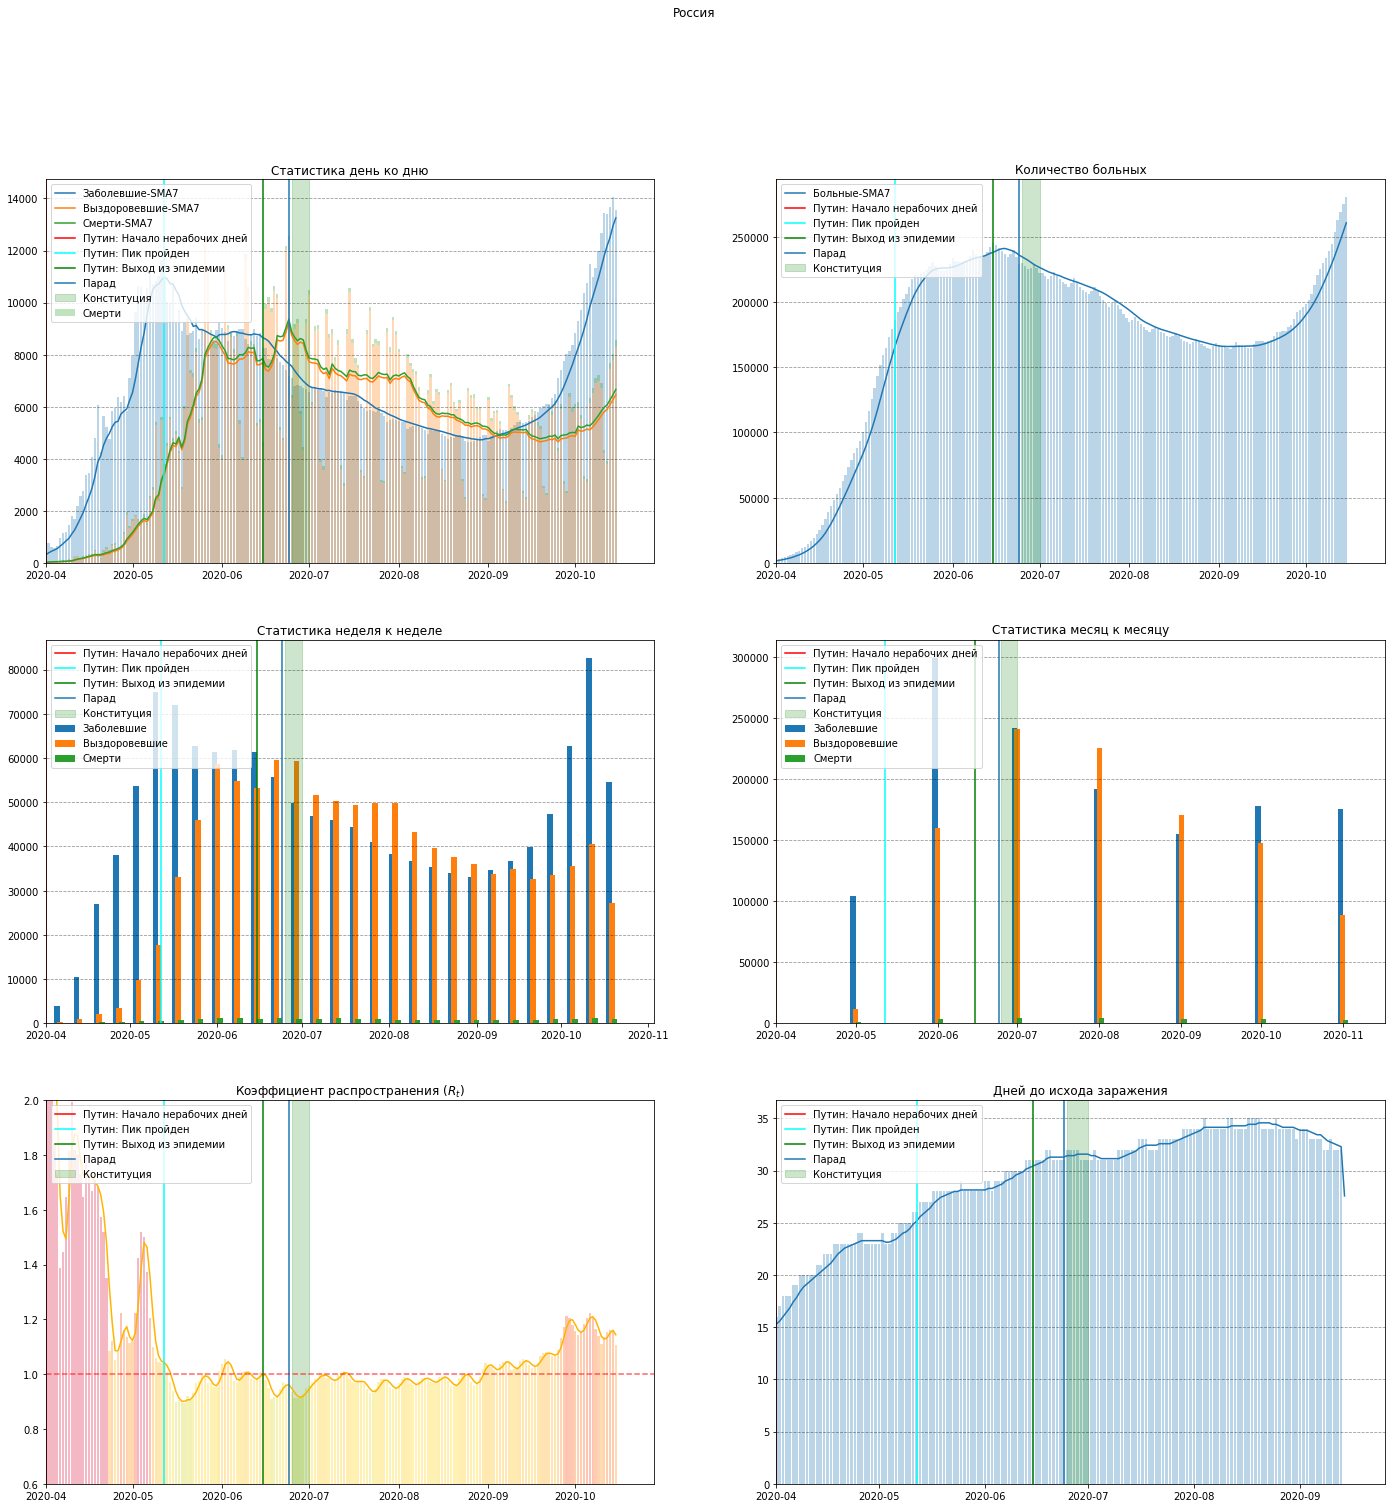

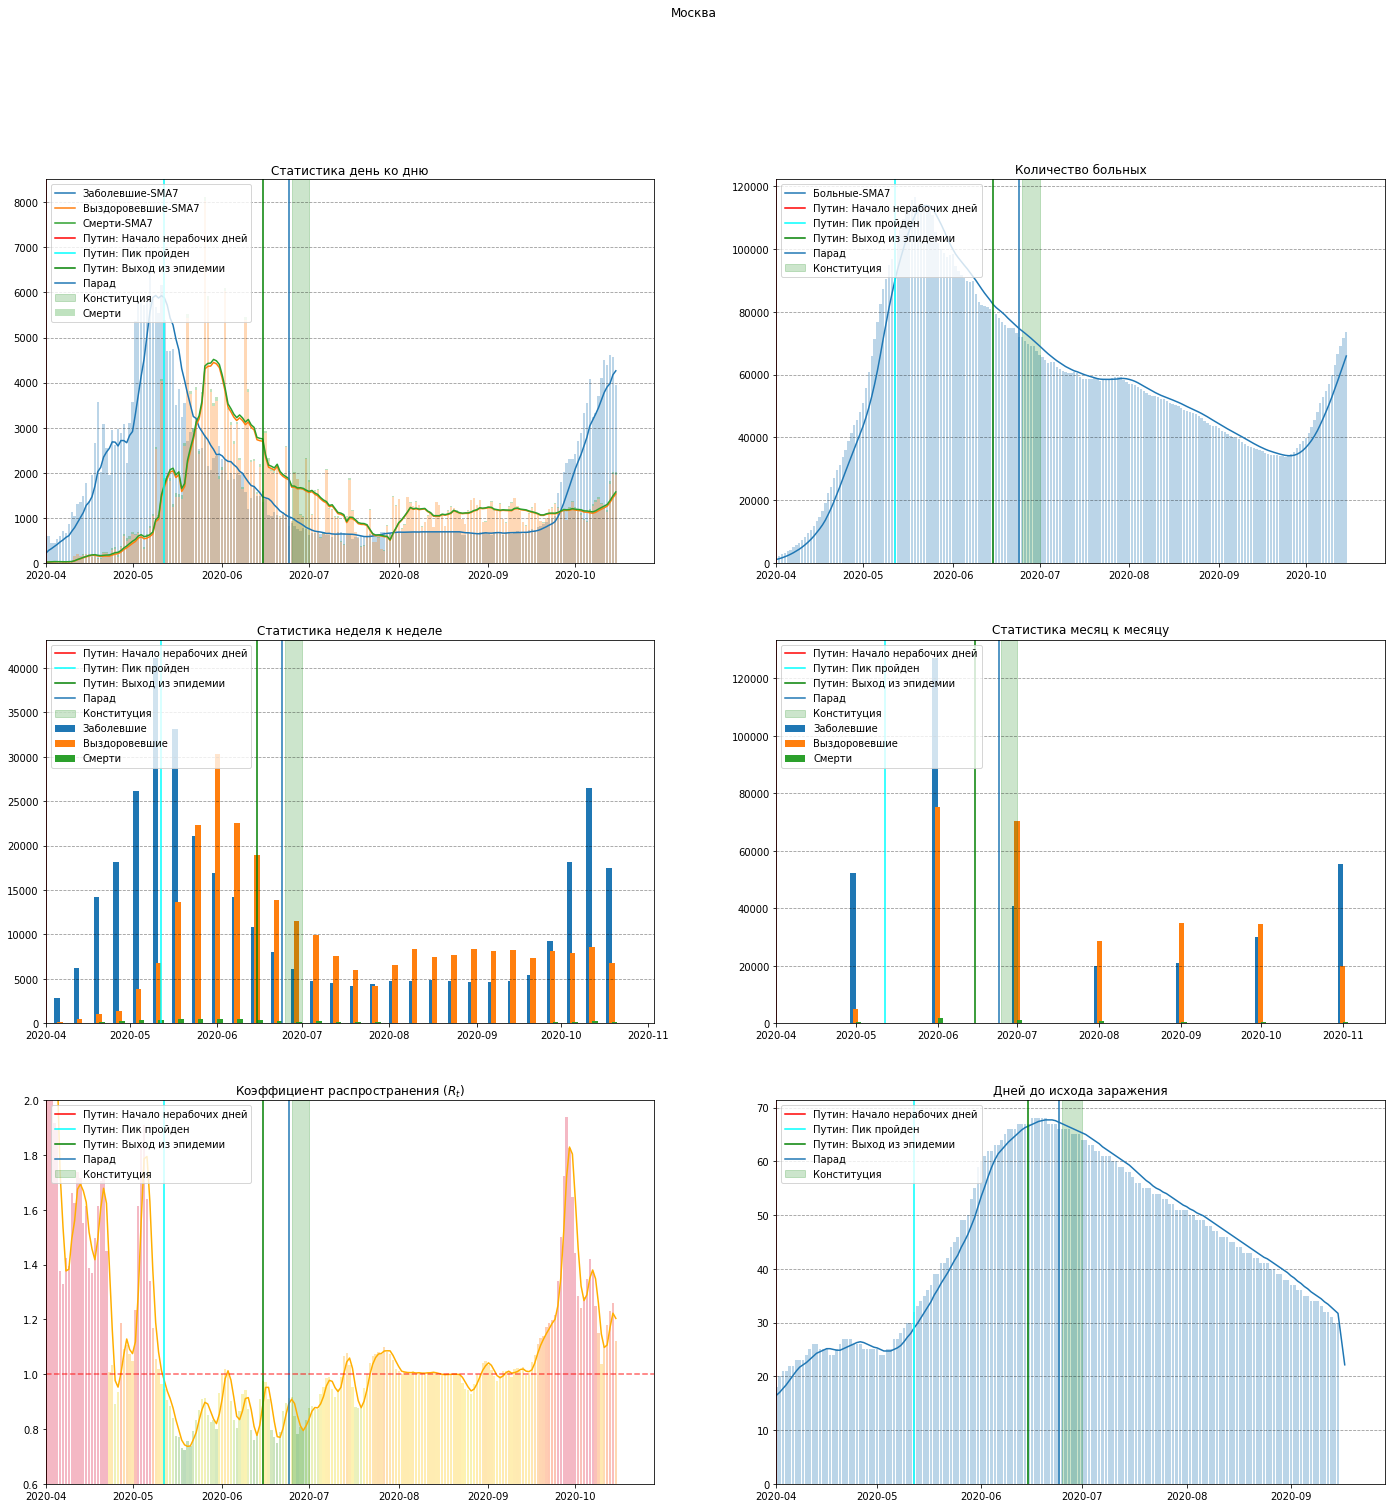

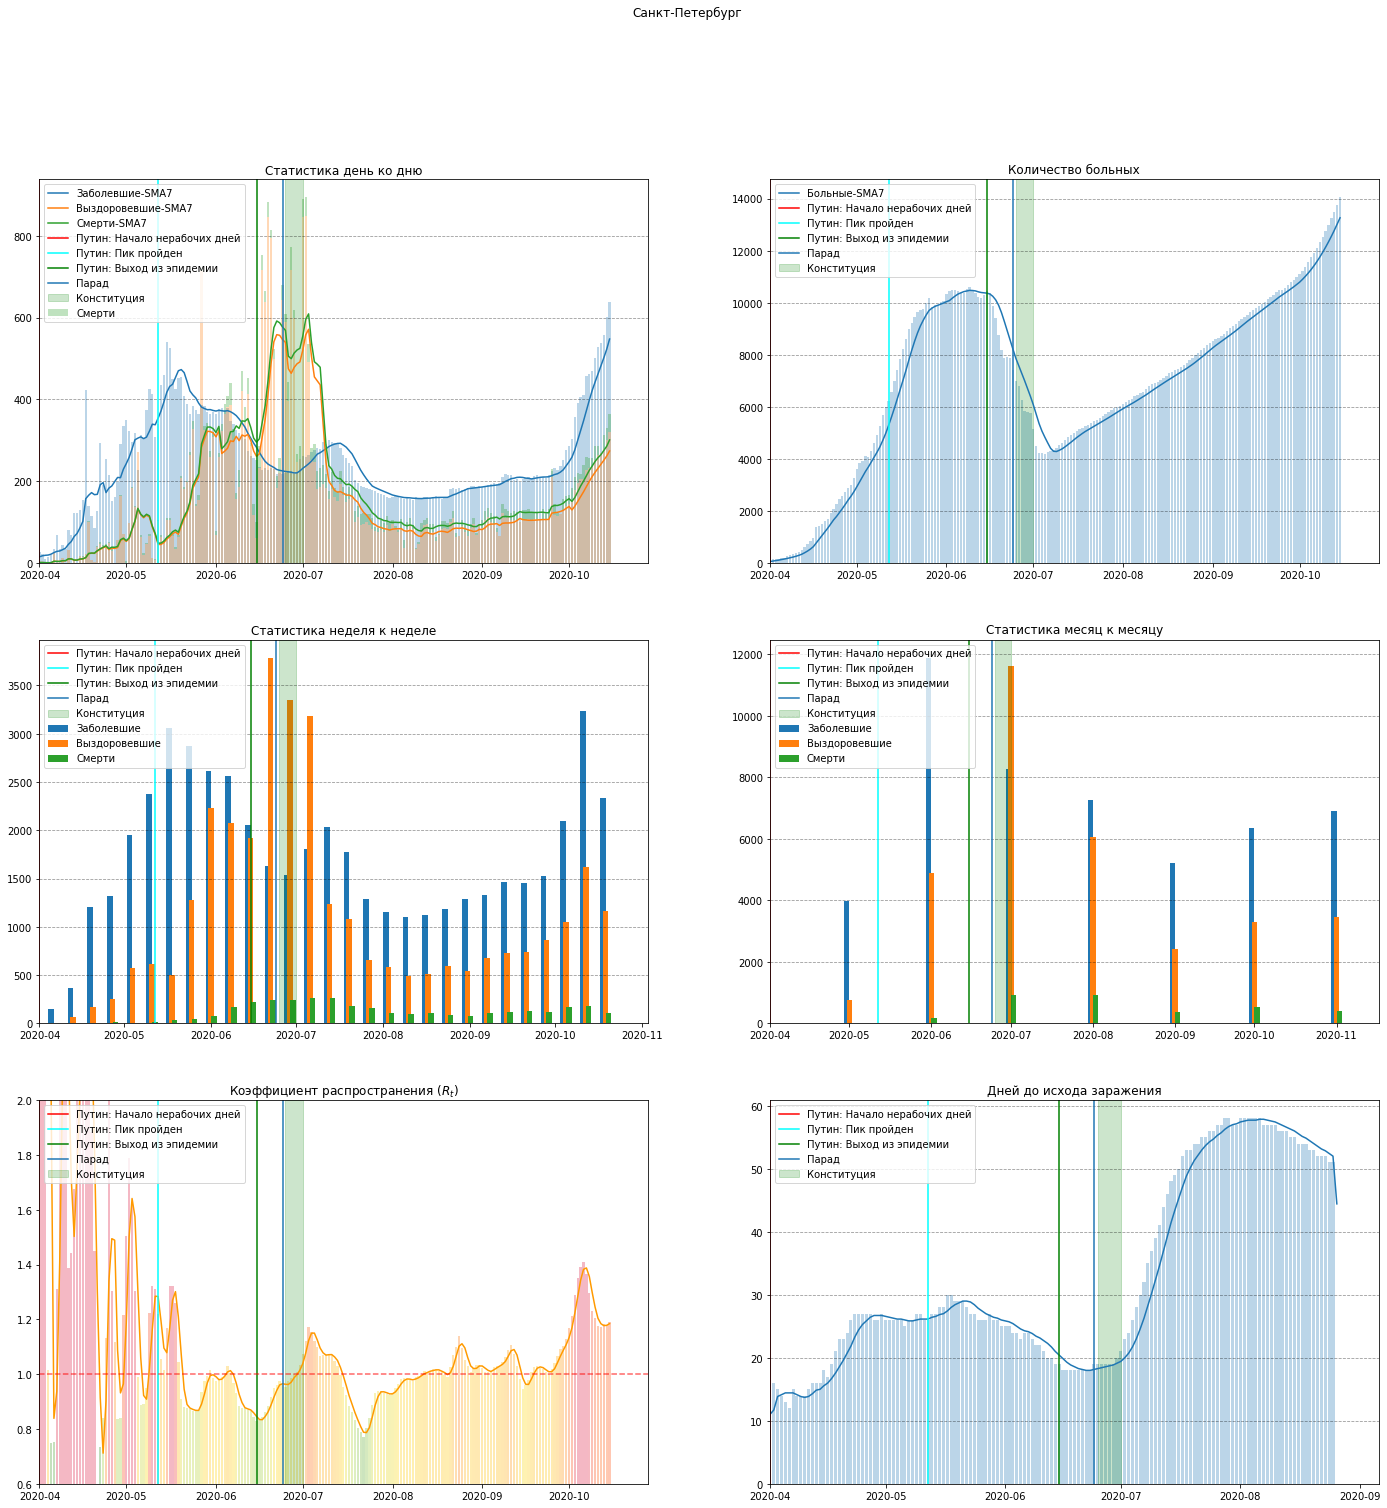

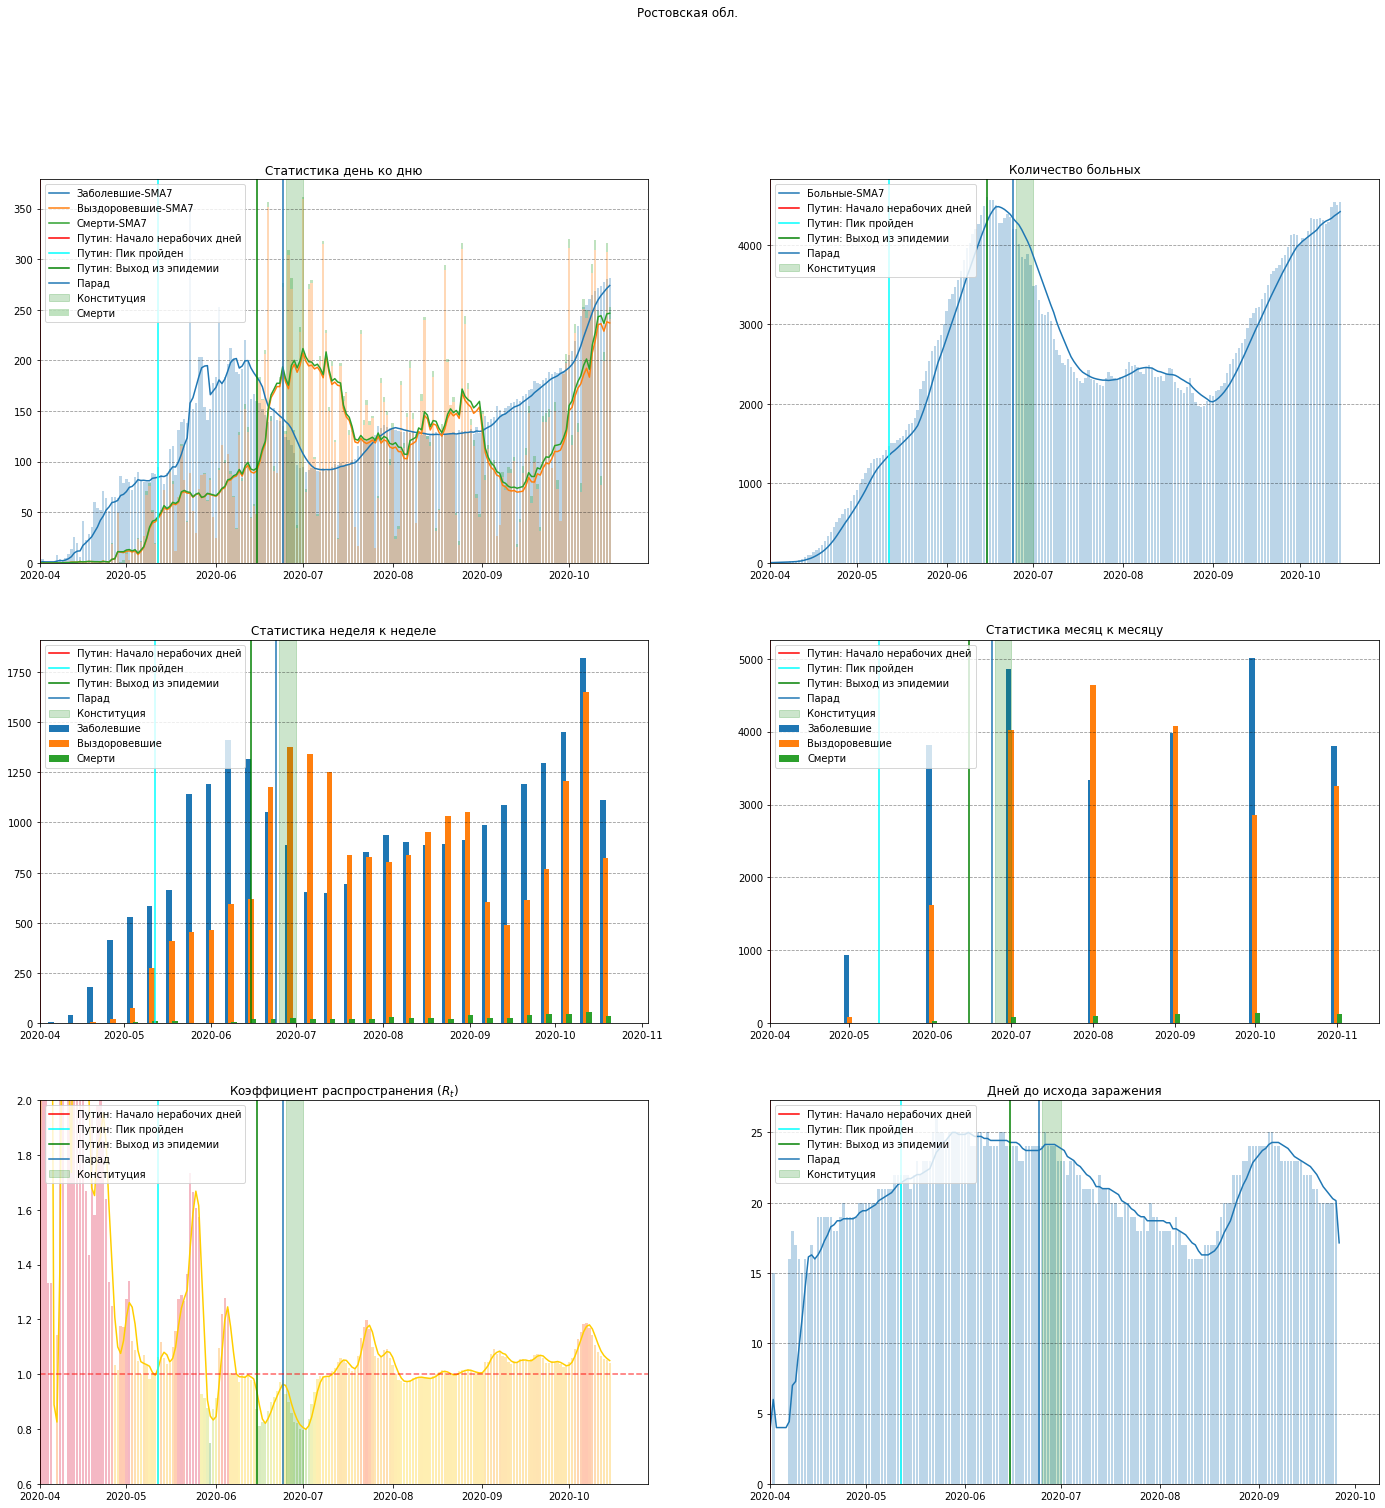

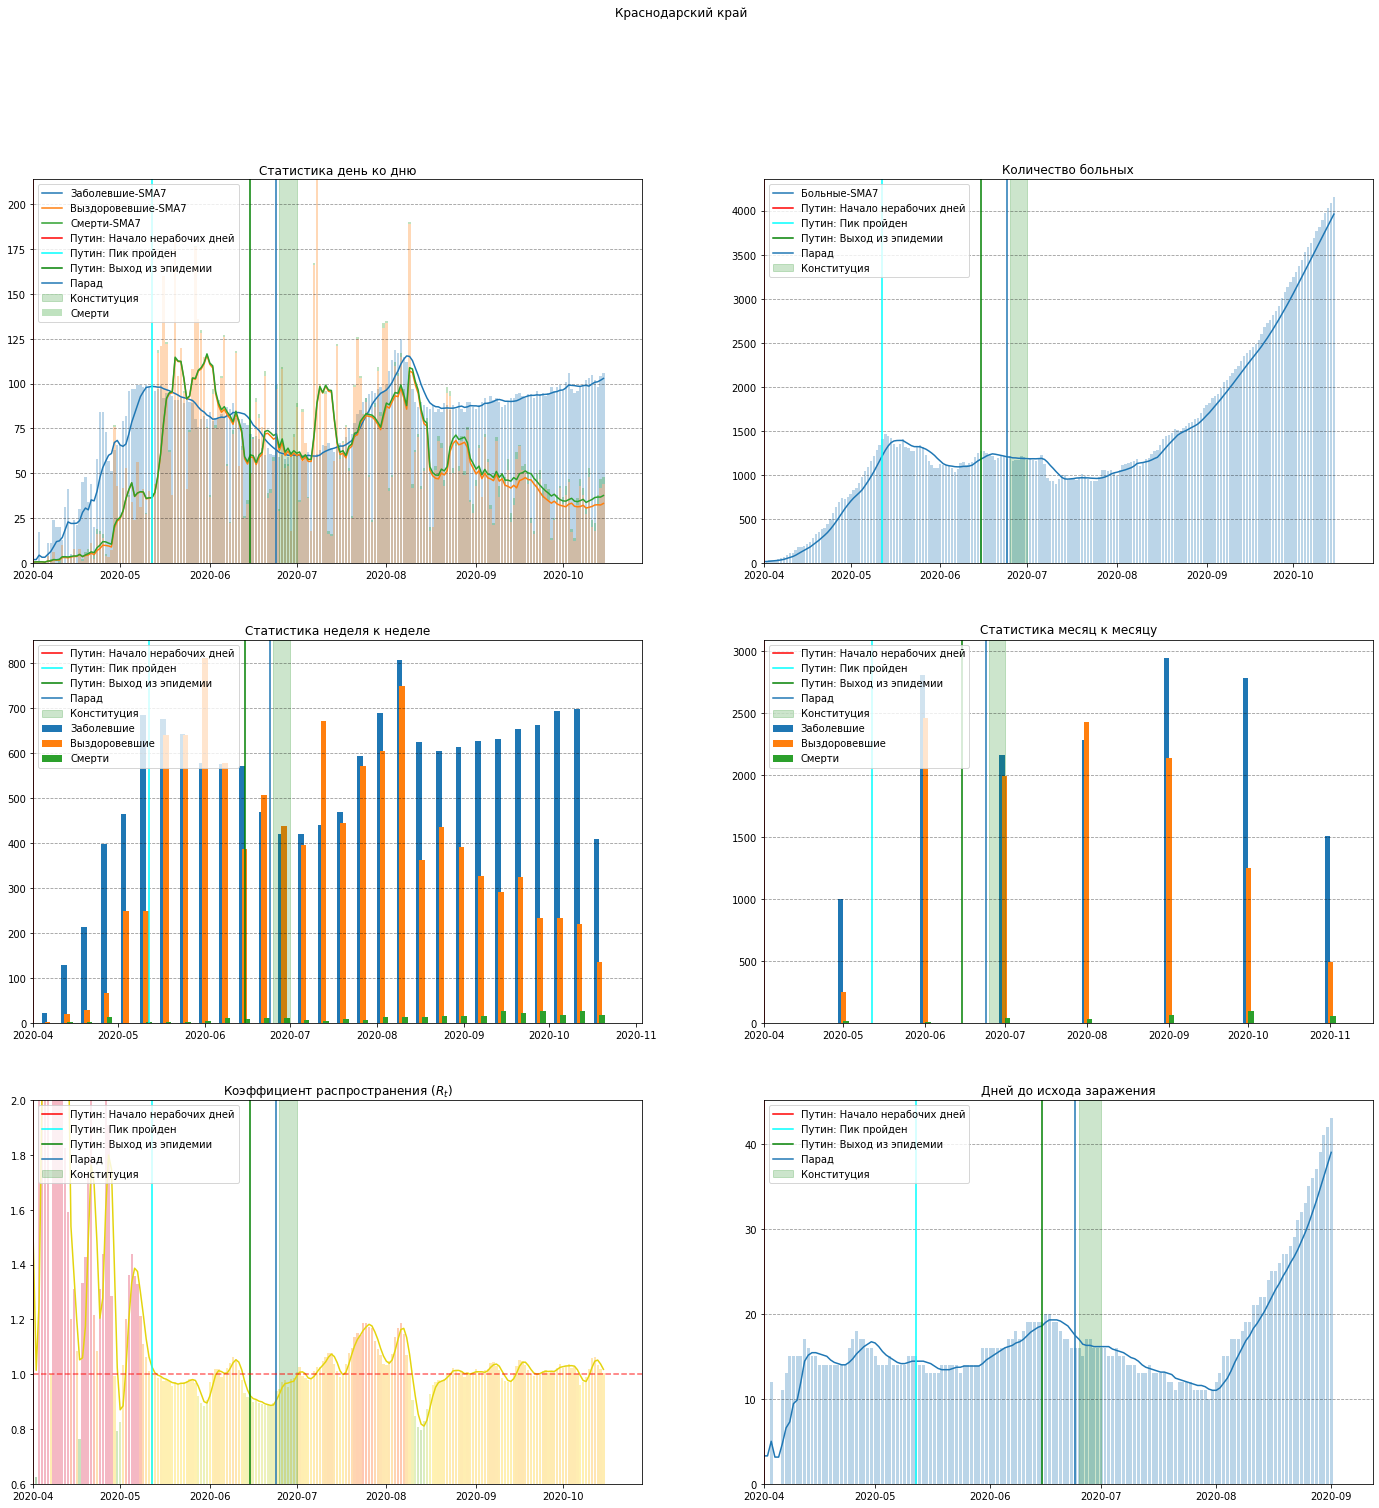

In [9]:
regions = ["Москва", "Санкт-Петербург", "Ростовская обл.", "Краснодарский край"] #list(utils.get_country_regions("Russia"))
figure = pyplot.figure(figsize=(24,24))
plot.report(figure, storage.get_country_report("Russia"), "Россия", start_date = start_date)

for region in regions:
    figure = pyplot.figure(figsize=(24,24))
    plot.report(figure, storage.get_region_report("Russia", region), region, start_date = start_date)

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


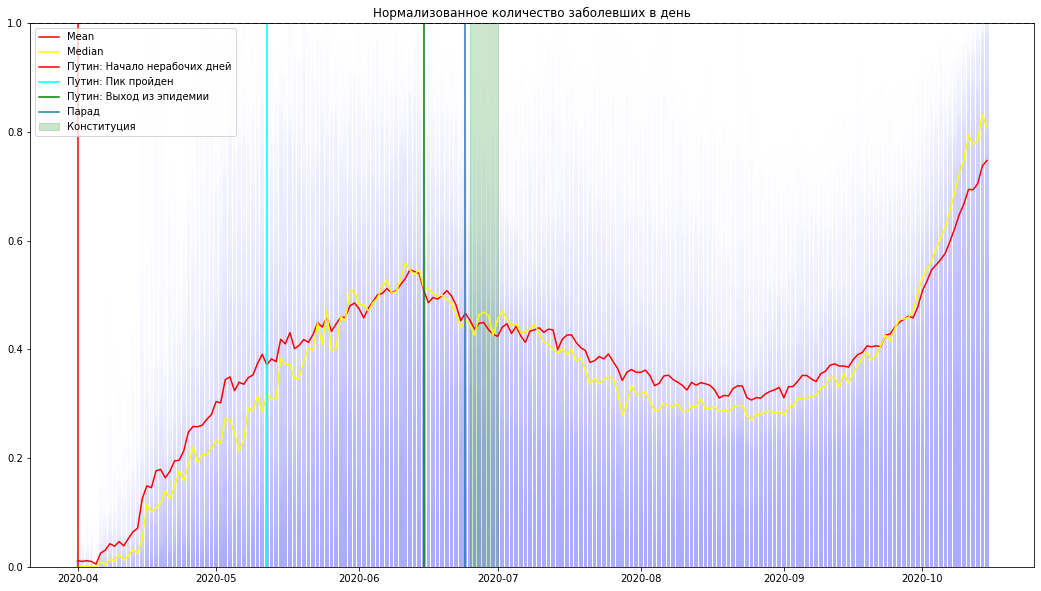

In [10]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

country_name = "Russia"
column_name = "Confirmed_Change"
all_regions = storage.get_regions_report_by_column(country_name,column_name,start_date=pd.to_datetime("01-04-2020",dayfirst=True)).apply(helpers.normalize)

for region in all_regions.columns:
    ax.bar(all_regions.index, all_regions[region], alpha = 1/len(all_regions), color = "Blue")

mean = all_regions.mean(axis=1)
median = all_regions.median(axis=1)
ax.plot(mean.index,mean, color = "Red", label = "Mean")
ax.plot(median.index,median, color = "Yellow", label="Median")
plot.key_russian_dates(ax)
ax.axhline(1,color='black', linestyle='dashed', alpha=1)

ax.set_ylim(bottom=0, top = 1)
ax.legend()
pyplot.title("Нормализованное количество заболевших в день")
pyplot.show()


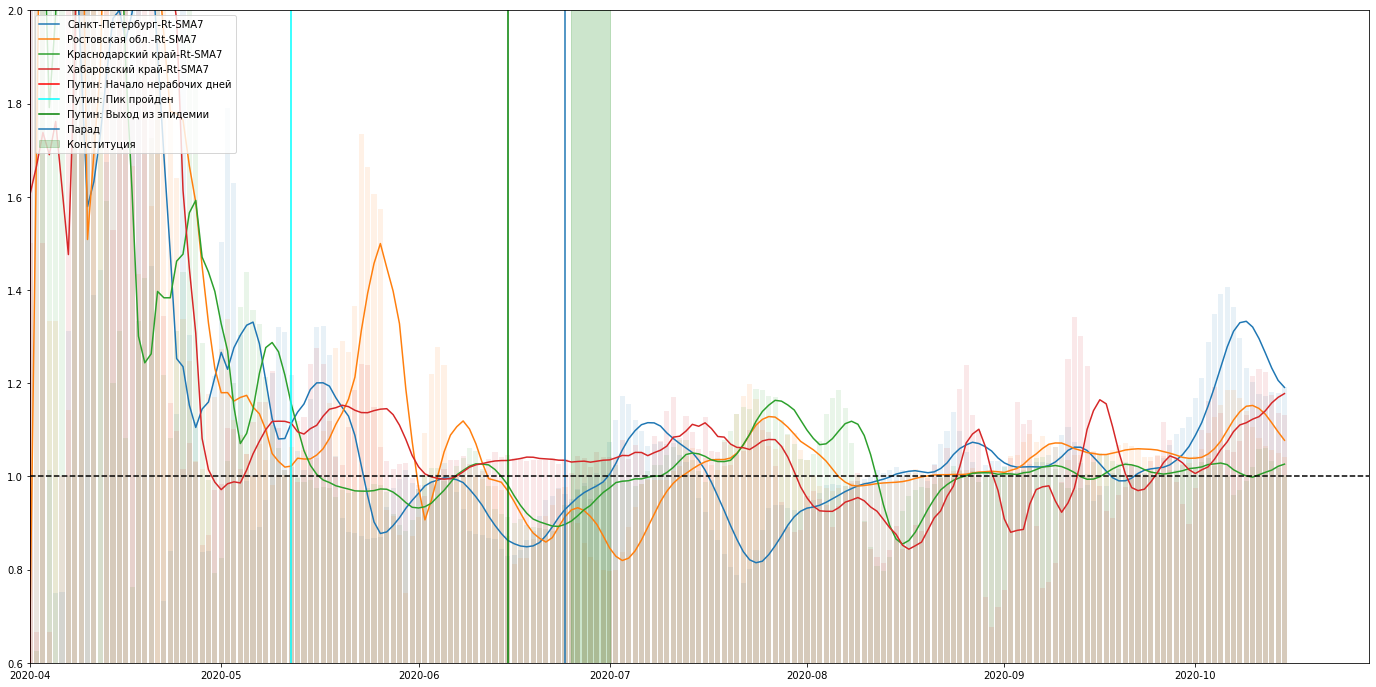

In [11]:
import seaborn as sb
pyplot.figure(figsize=(24,12))

ax = pyplot.subplot(111)
ax.xaxis_date()

column_name = 'Rt'

for region_name in ["Санкт-Петербург", "Ростовская обл.", "Краснодарский край", "Хабаровский край"]:
    region_df = storage.get_region_report("Russia", region_name)

    plot.bar_with_sma_line(ax, region_df[column_name], 7, region_name+'-'+column_name, 0.1)
plot.key_russian_dates(ax)

ax.axhline(1,color='black', linestyle='dashed', alpha=1)
ax.set_xlim(start_date)
ax.set_ylim(0.6, 2)

ax.legend(loc='upper left')
pyplot.show()

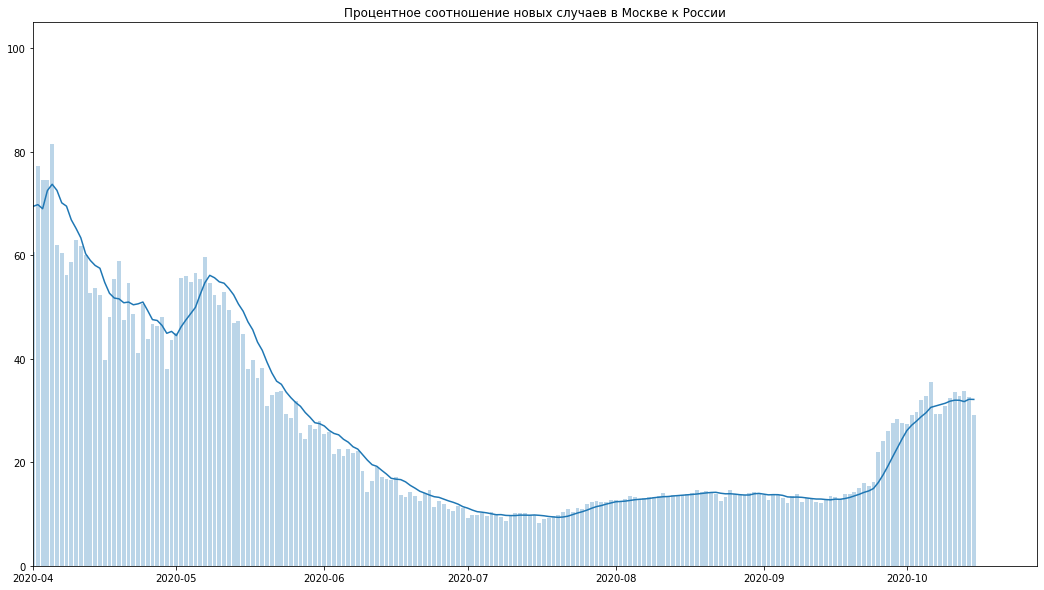

In [12]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()
plot.bar_with_sma_line(ax ,(storage.get_region_report("Russia", "Москва")["Confirmed_Change"] / storage.get_country_report("Russia")['Confirmed_Change'])*100)
ax.set_xlim(pd.to_datetime("01-04-2020",dayfirst=True))
ax.set_title('Процентное соотношение новых случаев в Москве к России')
pyplot.show()

In [13]:
(storage.get_region_report("Russia", "Москва")["Confirmed_Change"] / storage.get_country_report("Russia")['Confirmed_Change'])*100

Date
2020-01-31     0.000000
2020-02-01          NaN
2020-02-02          NaN
2020-02-03          NaN
2020-02-04          NaN
                ...    
2020-10-11    33.484601
2020-10-12    32.783828
2020-10-13    33.732652
2020-10-14    32.568905
2020-10-15    29.079374
Name: Confirmed_Change, Length: 259, dtype: float64

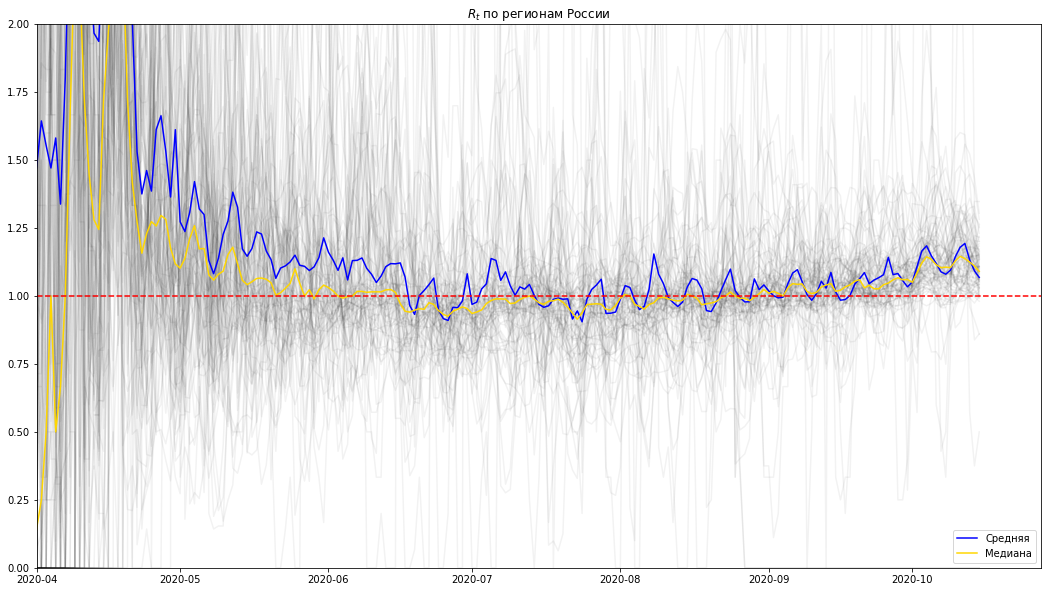

In [14]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

country_name = "Russia"
column_name = "Rt"
all_regions = storage.get_regions_report_by_column(country_name,column_name,)#.rolling(window=3).mean()

for region in all_regions.columns:
    ax.plot(all_regions.index, all_regions[region], alpha = .05, color = "Black")

mean = all_regions.mean(axis=1)
median = all_regions.median(axis=1)
#plot.key_russian_dates(ax)
ax.plot(mean.index,mean, color = "Blue", label = "Средняя")
ax.plot(median.index,median, color = "Gold", label="Медиана")
ax.axhline(1, color='Red', linestyle='dashed')

ax.set_xlim(start_date)
ax.set_ylim(0,2)

#ax.grid(axis='y', color='black', linestyle='dashed', alpha=0.4)
ax.legend()
pyplot.title(r"$R_t$ по регионам России")
pyplot.show()

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


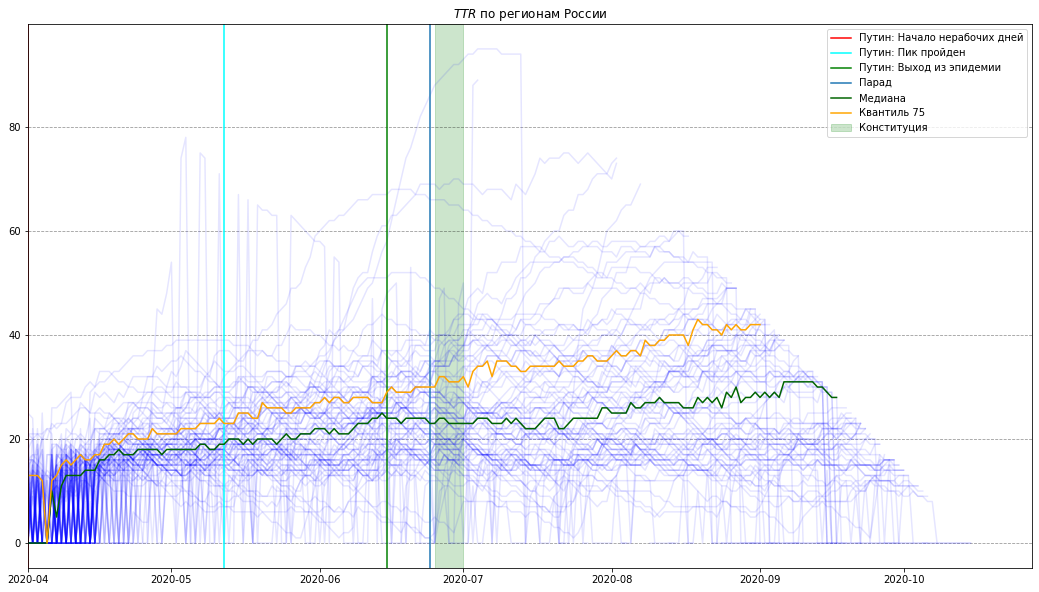

In [15]:
pyplot.figure(figsize=(18,10))

ax = pyplot.subplot(111)
ax.xaxis_date()

country_name = "Russia"
column_name = "Time_To_Resolve"
all_regions = storage.get_regions_report_by_column(country_name,column_name)

for region in all_regions.columns:
    ax.plot(all_regions.index, all_regions[region], alpha = .1, color = "Blue")

median = all_regions.median(axis=1)
quantile = all_regions.quantile(.75,axis = 1)
plot.key_russian_dates(ax)
ax.plot(median.index,median, color = "DarkGreen", label="Медиана")
ax.plot(quantile.index,quantile, color = "Orange", label="Квантиль 75")

ax.set_xlim(start_date)
#ax.set_ylim(0.6,5)

ax.grid(axis='y', color='black', linestyle='dashed', alpha=0.4)
ax.legend()
pyplot.title(r"$TTR$ по регионам России")
pyplot.show()

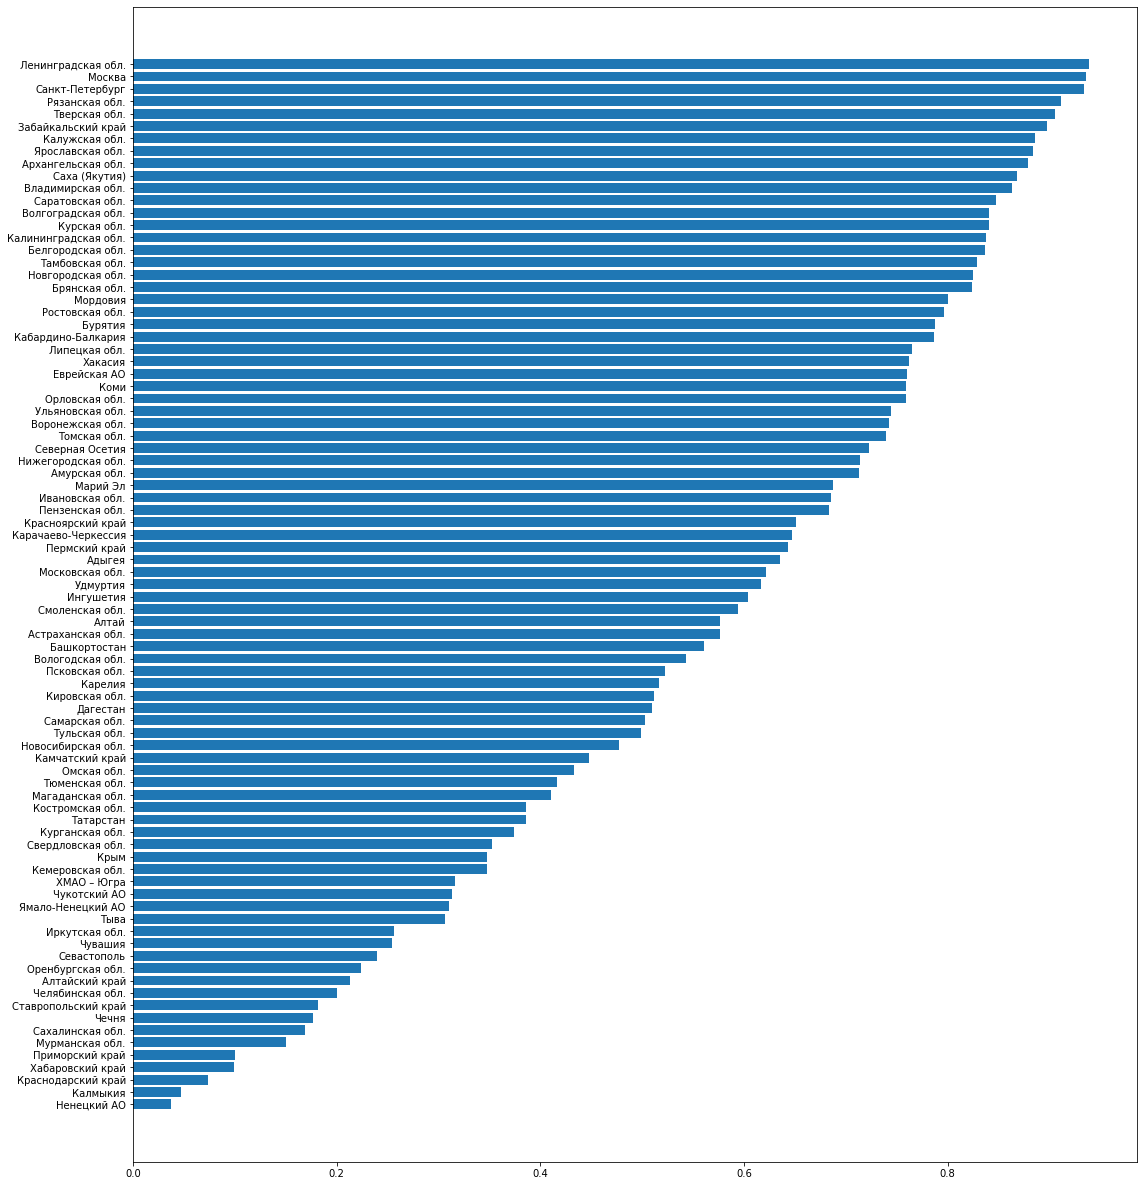

In [16]:
country_name = "Russia"
column_name = "Confirmed_Change"

start_date = pd.to_datetime('01-06-2020', dayfirst=True)
end_date = today
country_df = storage.get_country_report(country_name)[start_date:end_date]
allregions_df = storage.get_regions_report_by_column(country_name, column_name)[start_date:end_date]

pyplot.figure(figsize=(18, len(allregions_df.columns)/4))

corr_df =allregions_df.corrwith(country_df[column_name]).abs().sort_values()

ax = pyplot.subplot(111)

ax.barh(corr_df.index, corr_df)
#pyplot.xticks(rotation = 90)
pyplot.show()

In [17]:
corr_df.describe()

count    85.000000
mean      0.569156
std       0.257896
min       0.037092
25%       0.352270
50%       0.617162
75%       0.787659
max       0.939291
dtype: float64

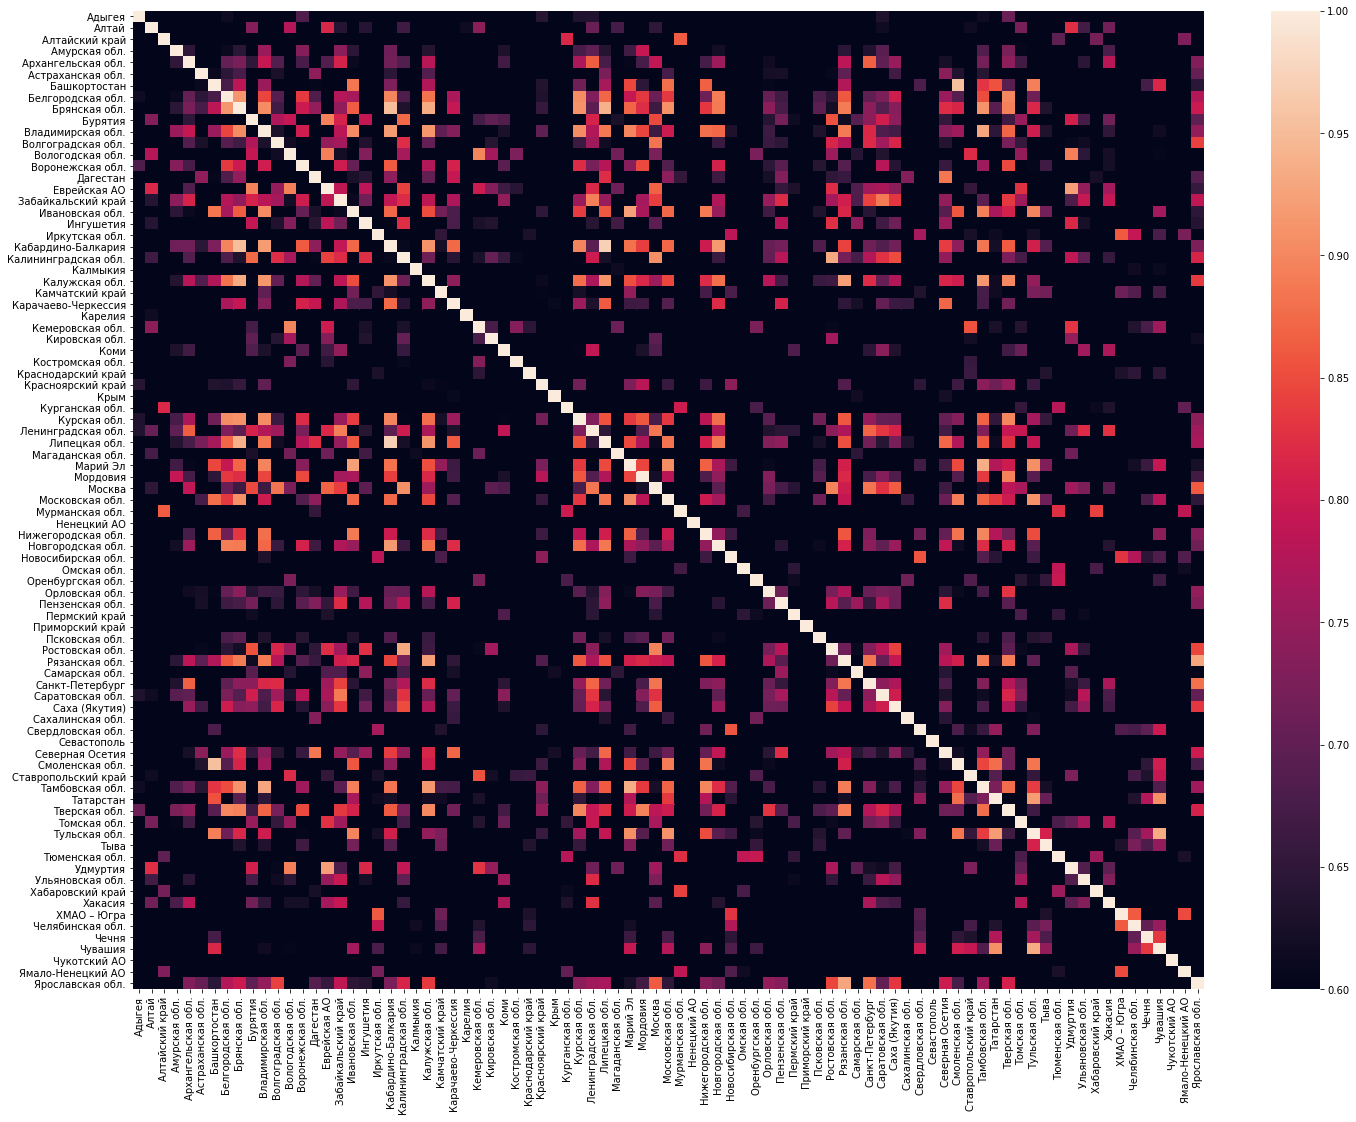

In [18]:
import seaborn as sns

pyplot.figure(figsize=(24, 18))
ax = pyplot.subplot(111)

sns.heatmap(allregions_df.corr().abs(), ax=ax, vmax = 1, vmin = 0.6)

pyplot.show()